# Titanic problem prediction for survival

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# PassengerId , Name, Ticket, Cabin, Embarked 
print(train_df['Cabin'].unique())
print('--'*40)
print(train_df['Embarked'].unique())
print('--'*40)
print(train_df['Ticket'].unique())


[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
-------------------------------------------

In [7]:
#using only Embarked col and rest droping from Train and Test df 
train_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'],axis=1,inplace=True)




In [8]:
test_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'],axis=1,inplace=True)

In [9]:
# dealing with null values
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#since Embarked has 2 null value checking the total sum their unique values
print(train_df['Embarked'].unique())

['S' 'C' 'Q' nan]


<AxesSubplot:xlabel='Embarked', ylabel='count'>

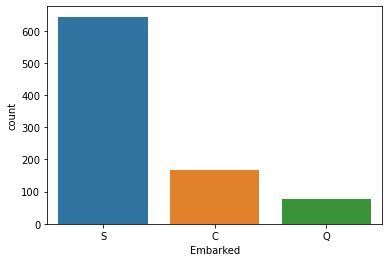

In [11]:
sns.countplot(x="Embarked", data=train_df)

In [12]:
# ok S has max count so we put S in null value
train_df['Embarked'] =train_df['Embarked'].fillna('S')

In [13]:
train_df['Embarked'].isna().sum()

0

In [14]:
test_df['Embarked'] =test_df['Embarked'].fillna('S')

In [15]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [16]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
test_df['Fare'].mean()

35.6271884892086

Data preprocessing for Age and Fare have not been done

In [18]:
#now in test data Fare has 1 null value
test_df['Fare'] =test_df['Fare'].fillna(test_df['Fare'].mean())

In [19]:
# only the Age cols null value left to deal with that let take mean add fill the null values
train_df['Age'] =train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] =test_df['Age'].fillna(test_df['Age'].mean())


In [20]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
#nice dealt with the null value 
# now dealing with the categorical values
train_df.dtypes=='O'

Survived    False
Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [23]:
test_df.dtypes=='O'

Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

<AxesSubplot:xlabel='Embarked', ylabel='count'>

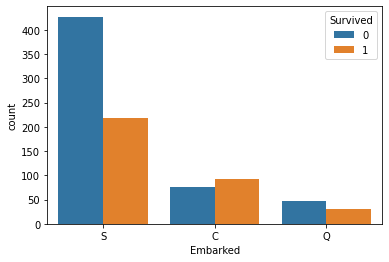

In [24]:
#counterplot the sex and embarked just to check 
sns.countplot(x="Embarked", data=train_df,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

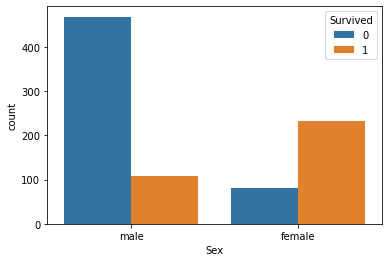

In [25]:
sns.countplot(x="Sex", data=train_df, hue='Survived')

In [26]:
#ok so in Embarked S and Male were not survived so sad!!
# well let change categorical to numerical 
# 1 way is to do dummy variable 
# and 2 is to map 
# we will go with dummy variable

train_df = pd.get_dummies(data=train_df, columns=['Sex','Embarked'],drop_first=True,)

In [27]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
#same for test data
test_df = pd.get_dummies(data=test_df, columns=['Sex','Embarked'],drop_first=True)

In [29]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [30]:
#well everything is ok for both test and train data 
# selecting independent and dependent variable
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
x_test = test_df.copy()
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [31]:
#perfect 
#let use logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = logreg.predict(x_test)

In [33]:
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

80.47

In [34]:
#well pretty good score 80%


In [57]:
#let do with kNN 

from sklearn.neighbors import KNeighborsClassifier 

In [58]:
#well everything is ok for both test and train data 
# selecting independent and dependent variable
x_traink = train_df.drop("Survived", axis=1)
y_traink = train_df["Survived"]
x_testk = test_df.copy()
x_traink.shape, y_traink.shape, x_testk.shape

((891, 8), (891,), (418, 8))

In [59]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_traink,y_traink)
y_predk= knn.predict(x_testk)


In [60]:
acc_log = round(logreg.score(x_traink, y_traink) * 100, 2)
acc_log

80.47